In this section we just imported import libraries, which are necessary for the building of the model.These libraries ,ainly include numpy, matplotlib and frameworks like keras and tensorflow.

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

This section shows the dataset(containing images(0-9)) each having the dimension of(1200*900) being uploaded to the colab from the drive.

Preprocessing of the dataset-ImageDataGenertaor is used for the preprocessing of the image dataset.It contains various parameters like resacling, rotation, fliping etc.
The dimensions of the image were brought to(224,224) and then trained.
It was seen that on reducing the size to great extent(32,32), the accuracy of the model was increasing, but there was a doubt of overfitting of the model, so preferred target size(224,224).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_data='/content/drive/MyDrive/MIDAS/0-9'


train_gen=ImageDataGenerator(rescale=1./255, rotation_range=0.3, shear_range=0.3, zoom_range=0.3,
                             horizontal_flip=True, vertical_flip=True)

train_generator=train_gen.flow_from_directory(train_data,color_mode='grayscale',target_size=(224,224),
                                              batch_size=16,class_mode='categorical',shuffle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 400 images belonging to 10 classes.


This shows the architecture used for the training purpose, the summary of the model is displayed below
Basically 3(convolutional nad max pooling) are used and activation function is (ReLU)

In [ ]:
model = tf.keras.Sequential([
  
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,1]),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=64,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),

  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(units=10, activation='softmax'),
  
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

It is seen that the loss below is decreasing and the accuracy of the model is increasing, if the number of the epochs are increased the accuracy would further increase.

In [ ]:
epochs=10
history = model.fit(train_generator,epochs=epochs)

Epoch 1/10
25/25 [==============================] - 71s 3s/step - loss: 2.7917 - accuracy: 0.0680
Epoch 2/10
25/25 [==============================] - 7s 272ms/step - loss: 2.2776 - accuracy: 0.1445
Epoch 3/10
25/25 [==============================] - 7s 275ms/step - loss: 2.0919 - accuracy: 0.2360
Epoch 4/10
25/25 [==============================] - 7s 273ms/step - loss: 1.9588 - accuracy: 0.2812
Epoch 5/10
25/25 [==============================] - 7s 266ms/step - loss: 1.5567 - accuracy: 0.4878
Epoch 6/10
25/25 [==============================] - 7s 268ms/step - loss: 1.5289 - accuracy: 0.4846
Epoch 7/10
25/25 [==============================] - 7s 271ms/step - loss: 1.2722 - accuracy: 0.5681
Epoch 8/10
25/25 [==============================] - 7s 271ms/step - loss: 1.3635 - accuracy: 0.5526
Epoch 9/10
25/25 [==============================] - 7s 271ms/step - loss: 1.1618 - accuracy: 0.6185
Epoch 10/10
25/25 [==============================] - 7s 271ms/step - loss: 1.1903 - accuracy: 0.6112


This section of the code, we use the pretrained network on the MNIST dataset


In [ ]:
import tensorflow as tf
import keras
import numpy as np

import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import datasets
from keras.preprocessing.image import ImageDataGenerator
mnist=tf.keras.datasets.mnist

This is the standard train and test split for the mnist dataset with their respective labels.

We have directly loaded the mnist dataset in the colab and trained it.

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


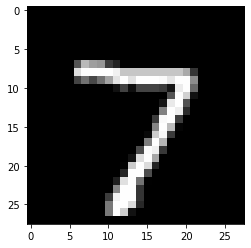

In [ ]:
plt.imshow(x_test[0],cmap='gray')

In [ ]:
 x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test = x_test.astype('float32')
x_test/=255
print(x_train.shape)
print(x_test.shape)




(60000, 28, 28, 1)
(10000, 28, 28, 1)


Since we are using the same architecture for the MNIST dataset to identify the difference (of same model using different datasets).

In [ ]:
model = tf.keras.Sequential([
  
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[28,28,1]),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=64,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),

  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(units=10, activation='softmax'),
  
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(x_train,y_train,epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 38s 3ms/step - loss: 0.3599 - accuracy: 0.8865
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0190 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0165 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0129 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

                                                               Comparison
  Model1:
  The original dataset used the images(1200*900)
  the dataset was not refined or preprocessed,
  due to which it took longer time for it to train and the accuracy is also low.

  Model2:
  MNIST is a refined dataset(28*28)
  due to which it is easier to train.
The convergence was also low and the accuracy was very high as compared to the Model1 for the same number of epochs.